In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
# Load the data
train = pd.read_csv('C:\\Users\\rchan\\Downloads\\MLP_proj\\input\\train.csv')
train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03-09-20 0:00,03-06-20 0:00,1800,15,N Hollywood,1563,...,75,M,W,101,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345,13,Newton,1367,...,41,M,H,216,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605,13,Newton,1343,...,67,M,B,501,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11-08-20 0:00,11-06-20 0:00,1800,19,Mission,1924,...,61,M,H,101,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130,12,77th Street,1245,...,0,X,X,401,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


# EDA

In [33]:
df=train.copy()
df.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03-09-20 0:00,03-06-20 0:00,1800,15,N Hollywood,1563,...,75,M,W,101,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345,13,Newton,1367,...,41,M,H,216,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605,13,Newton,1343,...,67,M,B,501,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11-08-20 0:00,11-06-20 0:00,1800,19,Mission,1924,...,61,M,H,101,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130,12,77th Street,1245,...,0,X,X,401,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [34]:
df.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [35]:
Null_val_lat=df['Latitude'].isnull().sum()
Zero_val_lat=df[df['Latitude']==0].shape[0]
Null_val_long=df['Longitude'].isnull().sum()
Zero_val_long=df[df['Longitude']==0].shape[0]
print('Null_val_lat:',Null_val_lat)
print('Zero_val_lat:',Zero_val_lat)
print('Null_val_long:',Null_val_long)
print('Zero_val_long:',Zero_val_long)
check_corl = train[(train['Latitude'] == 0) & (train['Longitude'] == 0)].shape[0]
print('check_corl:',check_corl)

Null_val_lat: 0
Zero_val_lat: 78
Null_val_long: 0
Zero_val_long: 78
check_corl: 78


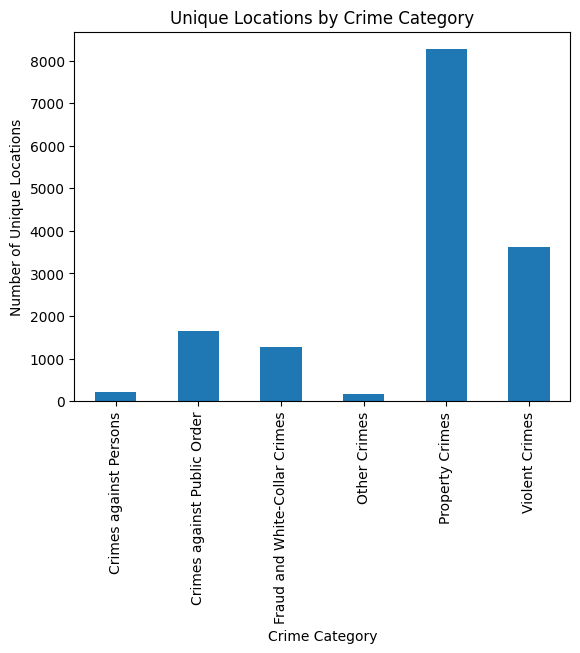

In [36]:
unique_locations = df.groupby('Crime_Category')['Location'].nunique()
unique_locations.sort_values(ascending=False)
unique_locations.plot(kind='bar')
plt.xlabel('Crime Category')
plt.ylabel('Number of Unique Locations')
plt.title('Unique Locations by Crime Category')
plt.show()

In [37]:
df['Cross_Street'].isnull().sum()

16552

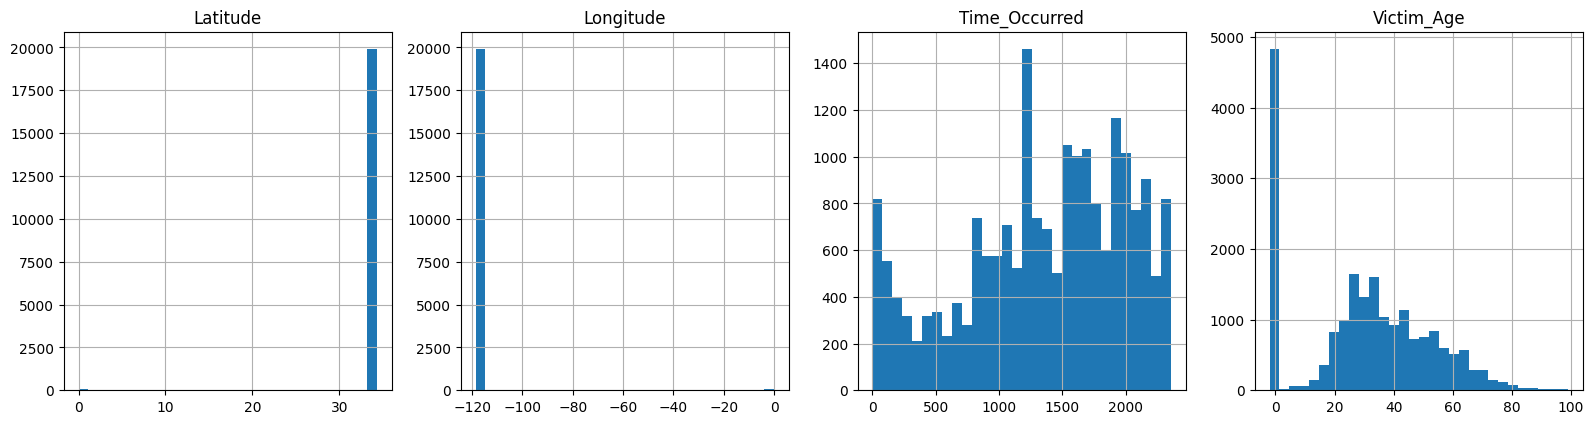

In [38]:
num_list=df[['Latitude','Longitude', 'Time_Occurred', 'Victim_Age']]
num_list.hist(bins=30, figsize=(20, 20), layout=(5, 5))
plt.tight_layout()
plt.show()

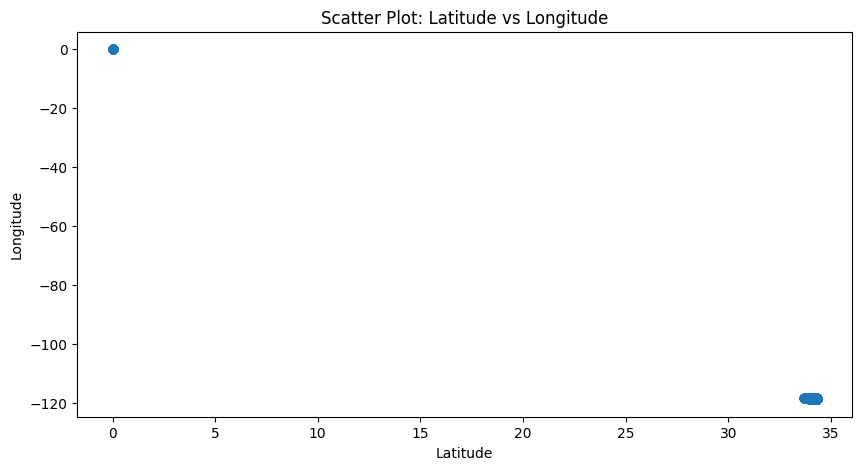

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(df['Latitude'],df['Longitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot: Latitude vs Longitude')
plt.show()

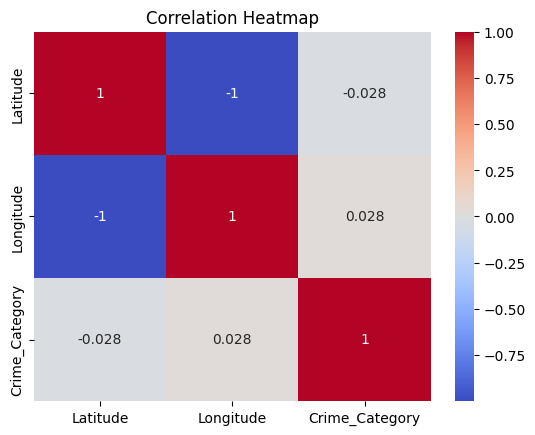

In [ ]:
import seaborn as sns

# Create a subset of the data frame with the required columns

subset = df[['Latitude', 'Longitude', 'Crime_Category']]
target_mapping = {'Property Crimes': 0, 'Violent Crimes': 1, 'Crimes against Public Order': 2, 'Fraud and White-Collar Crimes': 3, 'Crimes against Persons': 4, 'Other Crimes': 5}
df['Crime_Category'] = df['Crime_Category'].map(target_mapping)
# Calculate the correlation matrix
corr_matrix = subset.corr()

# Plot the correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

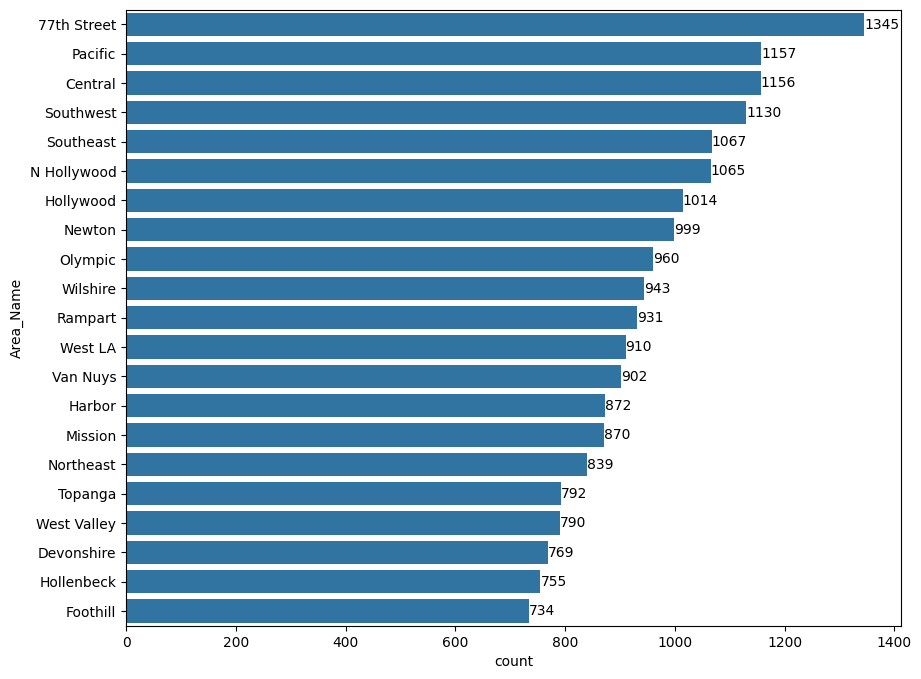

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data = df, y = 'Area_Name', order = df['Area_Name'].value_counts().index)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

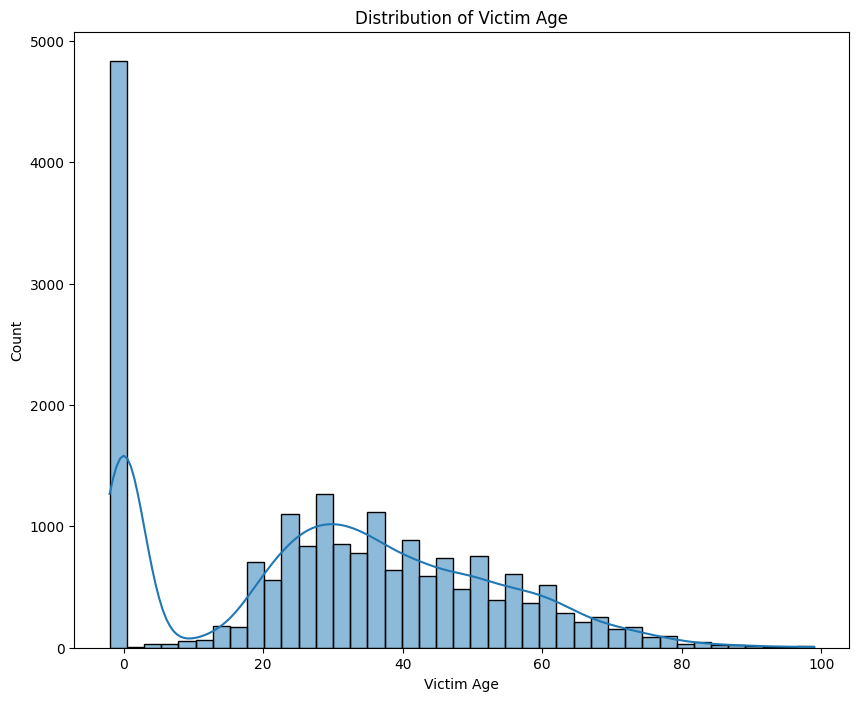

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='Victim_Age', kde=True)
plt.xlabel('Victim Age')
plt.ylabel('Count')
plt.title('Distribution of Victim Age')
plt.show()

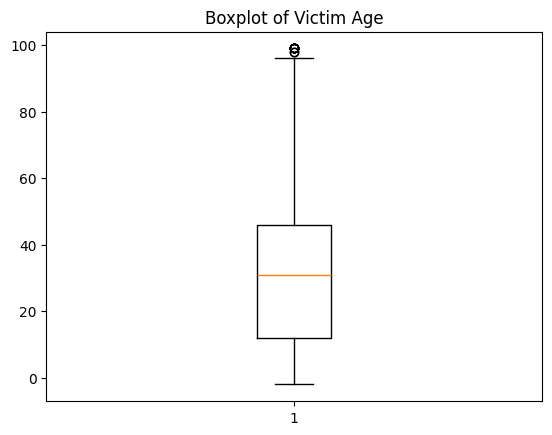

Number of outliers: 13


In [ ]:
plt.boxplot(df['Victim_Age'].dropna())
plt.title('Boxplot of Victim Age')
plt.show()
Q1 = train['Victim_Age'].quantile(0.25)
Q3 = train['Victim_Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train[(train['Victim_Age'] < lower_bound) | (train['Victim_Age'] > upper_bound)]
num_outliers = len(outliers)
print("Number of outliers:", num_outliers)

In [ ]:
date_col=['Date_Occurred','Date_Reported']
for i in date_col:
    df[i]=pd.to_datetime(df[i])
df['Time_Difference'] = (df['Date_Reported'] - df['Date_Occurred']).dt.days
df.head()

C:\Users\rchan\AppData\Local\Temp\ipykernel_19532\3058335177.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[i]=pd.to_datetime(df[i])
C:\Users\rchan\AppData\Local\Temp\ipykernel_19532\3058335177.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[i]=pd.to_datetime(df[i])


,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,Crime_Category,Time_Difference
0,34.1522,-118.3910,2020-03-09,2020-03-06,1800,15,1,385,75,M,W,101,NaN,IC,Property Crimes,3
1,34.0028,-118.2391,2020-02-27,2020-02-27,1345,13,1,0906 0352 0371 0446 1822 0344 0416 0417,41,M,H,216,400.0,IC,Property Crimes,0
2,34.0111,-118.2653,2020-08-21,2020-08-21,605,13,2,0329 1202,67,M,B,501,NaN,IC,Property Crimes,0
3,34.2953,-118.4590,2020-11-08,2020-11-06,1800,19,1,0329 1300,61,M,H,101,NaN,IC,Property Crimes,2
4,33.9787,-118.2918,2020-02-25,2020-02-25,1130,12,1,0416 0945 1822 0400 0417 0344,0,X,X,401,400.0,IC,Property Crimes,0


In [ ]:
df['Month_Occurred'] = df['Date_Occurred'].dt.month
df.head()

,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,Crime_Category,Time_Difference,Month_Occurred
0,34.1522,-118.3910,2020-03-09,2020-03-06,1800,15,1,385,75,M,W,101,NaN,IC,0,3,3
1,34.0028,-118.2391,2020-02-27,2020-02-27,1345,13,1,0906 0352 0371 0446 1822 0344 0416 0417,41,M,H,216,400.0,IC,0,0,2
2,34.0111,-118.2653,2020-08-21,2020-08-21,605,13,2,0329 1202,67,M,B,501,NaN,IC,0,0,8
3,34.2953,-118.4590,2020-11-08,2020-11-06,1800,19,1,0329 1300,61,M,H,101,NaN,IC,0,2,11
4,33.9787,-118.2918,2020-02-25,2020-02-25,1130,12,1,0416 0945 1822 0400 0417 0344,0,X,X,401,400.0,IC,0,0,2


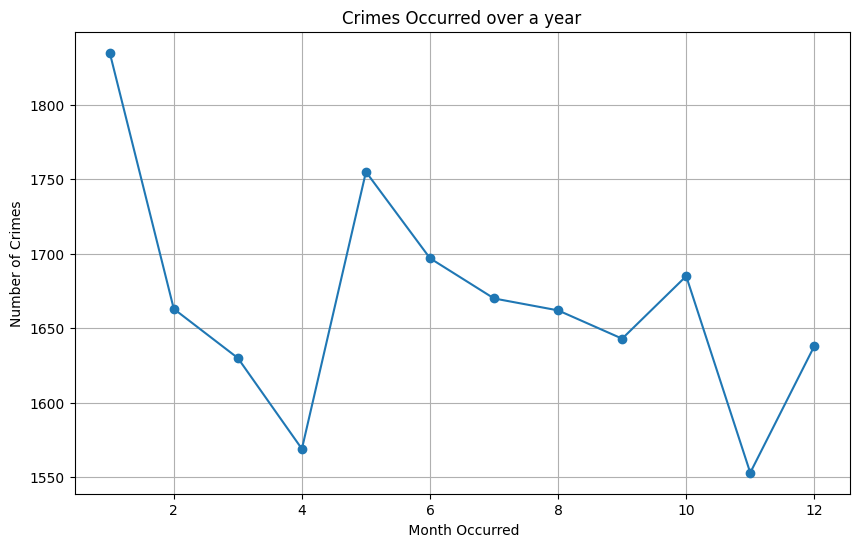

In [ ]:
yearly_crime = df.groupby('Month_Occurred').size()
plt.figure(figsize=(10, 6))
yearly_crime.plot(kind='line', marker='o')
plt.title('Crimes Occurred over a year')
plt.xlabel(' Month Occurred')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

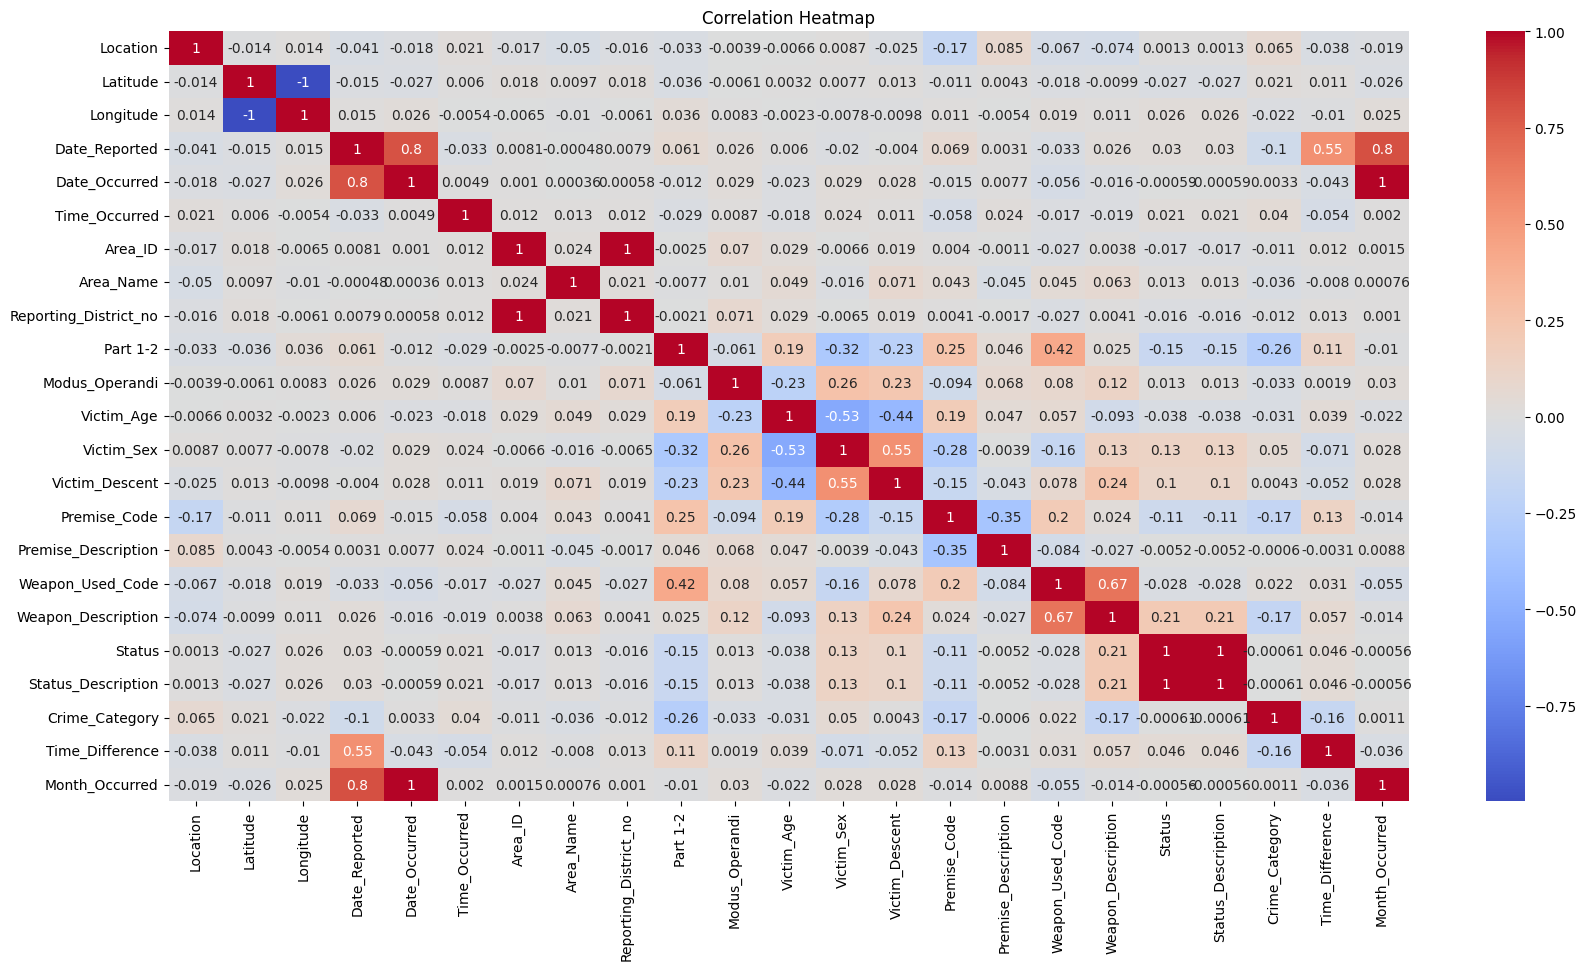

In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Drop the "Cross_Street" column from the dataframe
df_filtered = df.drop("Cross_Street", axis=1)

# Label encode string and date columns
le = LabelEncoder()
for col in df_filtered.columns:
    if df_filtered[col].dtype == 'object' or df_filtered[col].dtype == 'datetime64[ns]':
        df_filtered[col] = le.fit_transform(df_filtered[col])

# Calculate the correlation matrix
corr_matrix = df_filtered.corr()

plt.figure(figsize=(20,10))
# Plot the correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier

#drop dependent columns
train.drop(['Location','Cross_Street','Area_Name','Premise_Description','Weapon_Description','Status_Description','Reporting_District_no'], axis=1, inplace=True)
X = train.drop('Crime_Category', axis=1)
y = train['Crime_Category']

#Correcting the missing values
X['Latitude'] = X['Latitude'].replace(0, np.nan)
X['Longitude'] = X['Longitude'].replace(0, np.nan)
X.loc[X['Victim_Age'] <= 0, 'Victim_Age'] = np.nan
X.dtypes

Latitude            float64
Longitude           float64
Date_Reported        object
Date_Occurred        object
Time_Occurred         int64
Area_ID               int64
Part 1-2              int64
Modus_Operandi       object
Victim_Age          float64
Victim_Sex           object
Victim_Descent       object
Premise_Code          int64
Weapon_Used_Code    float64
Status               object
dtype: object

# Feature Engineering

In [ ]:
date_cols = ['Date_Reported', 'Date_Occurred']
X[date_cols] = X[date_cols].apply(pd.to_datetime)
X['Time_Difference'] = (X['Date_Reported'] - X['Date_Occurred']).dt.days.astype(object)
X['Month_Occurred'] = X['Date_Occurred'].dt.month.astype(object)
X.head()
X.dtypes

C:\Users\rchan\AppData\Local\Temp\ipykernel_19532\557291989.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[date_cols] = X[date_cols].apply(pd.to_datetime)
C:\Users\rchan\AppData\Local\Temp\ipykernel_19532\557291989.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[date_cols] = X[date_cols].apply(pd.to_datetime)


Latitude                   float64
Longitude                  float64
Date_Reported       datetime64[ns]
Date_Occurred       datetime64[ns]
Time_Occurred                int64
Area_ID                      int64
Part 1-2                     int64
Modus_Operandi              object
Victim_Age                 float64
Victim_Sex                  object
Victim_Descent              object
Premise_Code                 int64
Weapon_Used_Code           float64
Status                      object
Time_Difference             object
Month_Occurred              object
dtype: object

# Pipelines and Column Transform

In [ ]:
cat_cols = ['Time_Difference','Month_Occurred','Area_ID','Part 1-2','Modus_Operandi','Victim_Sex','Victim_Descent','Premise_Code','Weapon_Used_Code','Status']
num_cols_median=['Victim_Age']
num_cols_mode=['Latitude','Longitude','Time_Occurred']
numeric_transformer_median = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])
numeric_transformer_mode = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num_median', numeric_transformer_median, num_cols_median),
        ('num_mode', numeric_transformer_mode, num_cols_mode),
        ('cat', categorical_transformer, cat_cols)
    ])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler())])
X_scaled = pipeline.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=['Victim_Age','Latitude','Longitude','Time_Occurred','Time_Difference','Month_Occurred', 'Area_ID','Part 1-2','Modus_Operandi','Victim_Sex','Victim_Descent','Premise_Code','Weapon_Used_Code','Status'])
X_scaled.head()

,Victim_Age,Latitude,Longitude,Time_Occurred,Time_Difference,Month_Occurred,Area_ID,Part 1-2,Modus_Operandi,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status
0,2.606813,0.688238,-0.354516,0.692819,-0.184710,-0.992259,0.690492,-0.847736,1.153533,0.600955,1.254161,-1.026887,0.240942,0.490578
1,0.139456,-0.628130,1.114436,-0.011423,-0.229886,-1.281353,0.358983,-0.847736,-0.554919,0.600955,-0.420174,-0.042691,0.240942,0.490578
2,2.026258,-0.554998,0.861068,-1.156785,-0.229886,0.453213,0.358983,1.179613,-1.580215,0.600955,-1.466634,0.980874,0.240942,0.490578
3,1.590843,1.949096,-1.012111,0.692819,-0.199769,1.320497,1.353511,-0.847736,-1.571760,0.600955,-0.420174,-1.026887,0.240942,0.490578
4,-0.150821,-0.840476,0.604799,-0.344197,-0.229886,-1.281353,0.193228,-0.847736,-0.834212,1.547789,1.463452,0.626563,0.240942,0.490578


In [ ]:
#ordianl encoding the target variable
target_mapping = {'Property Crimes': 0, 'Violent Crimes': 1, 'Crimes against Public Order': 2, 'Fraud and White-Collar Crimes': 3, 'Crimes against Persons': 4, 'Other Crimes': 5}
y = y.map(target_mapping)
y.value_counts()

Crime_Category
0    11666
1     4767
2     1808
3     1355
4      225
5      179
Name: count, dtype: int64

# Model

In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn.svm import SVC

# Create SVM model
svm_model = SVC()

# Fit the SVM model
svm_model.fit(X_train, y_train)

# Predict the target variable for X_test
y_pred_svc = svm_model.predict(X_test)
# Calculate the accuracy of the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred_svc)

print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred_svc))

Accuracy: 0.78325
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4611
           1       0.62      0.76      0.68      1943
           2       0.77      0.29      0.42       730
           3       0.69      0.58      0.63       556
           4       0.76      0.27      0.40        82
           5       0.00      0.00      0.00        78

    accuracy                           0.78      8000
   macro avg       0.62      0.47      0.50      8000
weighted avg       0.78      0.78      0.77      8000



C:\Users\rchan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rchan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rchan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN model
knn_model = KNeighborsClassifier()

# Fit the KNN model
knn_model.fit(X_train, y_train)

# Predict the target variable for X_test
y_pred_knn = knn_model.predict(X_test)
# Calculate the accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy:', accuracy_knn)
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.722375
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      4611
           1       0.56      0.59      0.58      1943
           2       0.42      0.21      0.28       730
           3       0.60      0.50      0.55       556
           4       0.43      0.07      0.12        82
           5       0.18      0.03      0.04        78

    accuracy                           0.72      8000
   macro avg       0.50      0.38      0.41      8000
weighted avg       0.70      0.72      0.70      8000



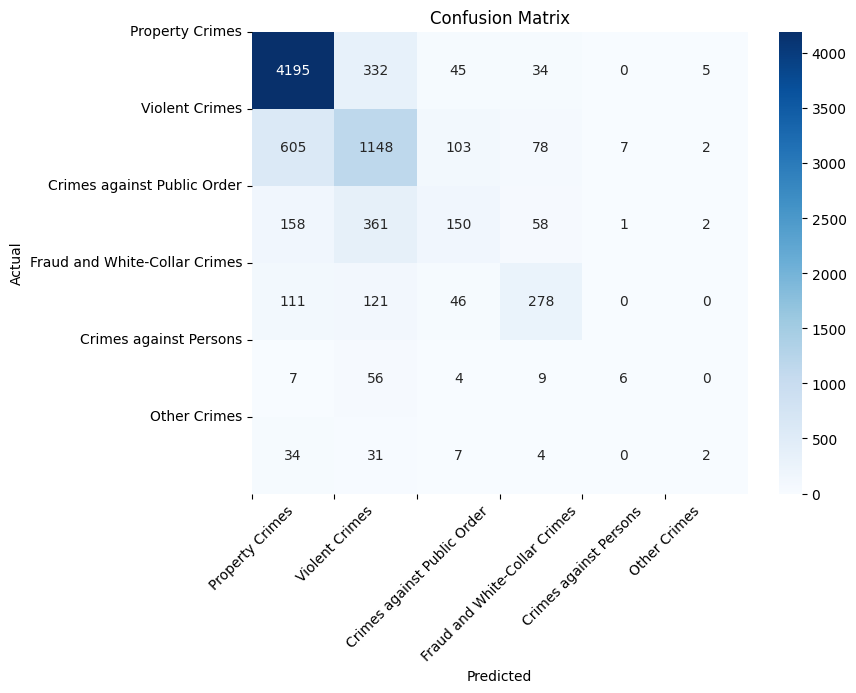

In [ ]:
# Plot the confusion matrix
crime_categories = ['Property Crimes', 'Violent Crimes', 'Crimes against Public Order', 'Fraud and White-Collar Crimes', 'Crimes against Persons', 'Other Crimes']
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(crime_categories)), crime_categories, rotation=45)
plt.yticks(np.arange(len(crime_categories)), crime_categories, rotation=0)  # Rotate the y-axis tick labels to be horizontal
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree Classifier model
dt_model = DecisionTreeClassifier()

# Fit the model
dt_model.fit(X_train, y_train)

# Predict the target variable for X_test
y_pred_dt = dt_model.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_dt)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.845125
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4611
           1       0.76      0.76      0.76      1943
           2       0.61      0.64      0.63       730
           3       0.85      0.82      0.83       556
           4       0.46      0.54      0.50        82
           5       0.17      0.15      0.16        78

    accuracy                           0.85      8000
   macro avg       0.63      0.64      0.64      8000
weighted avg       0.85      0.85      0.85      8000



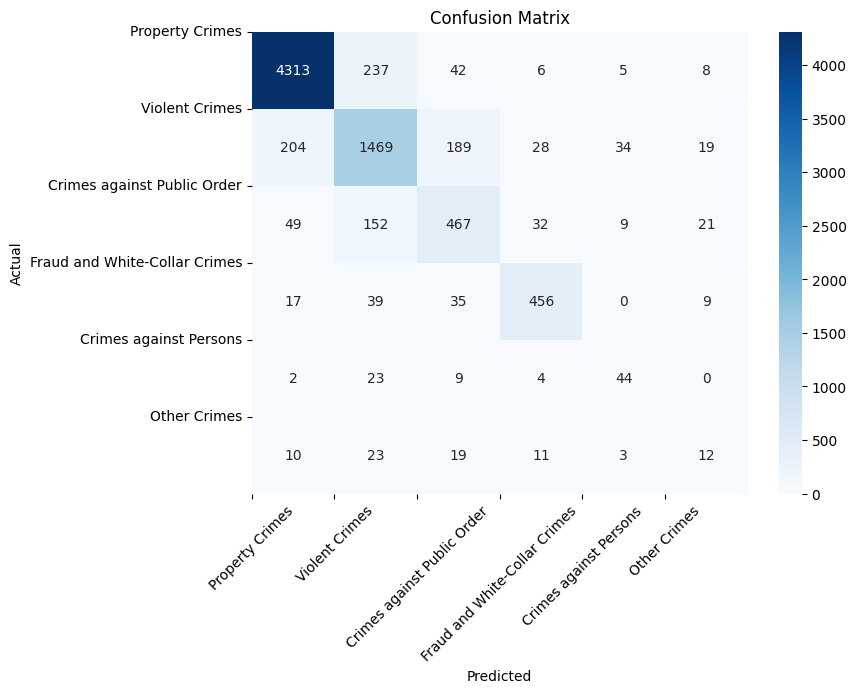

In [ ]:
# Plot the confusion matrix
crime_categories = ['Property Crimes', 'Violent Crimes', 'Crimes against Public Order', 'Fraud and White-Collar Crimes', 'Crimes against Persons', 'Other Crimes']
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(crime_categories)), crime_categories, rotation=45)
plt.yticks(np.arange(len(crime_categories)), crime_categories, rotation=0)  # Rotate the y-axis tick labels to be horizontal
plt.show()

In [ ]:
#Gradiend boot model Building
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gb = gb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_gb)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred_gb))

Accuracy: 0.891
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4611
           1       0.79      0.87      0.83      1943
           2       0.81      0.66      0.73       730
           3       0.91      0.85      0.88       556
           4       0.59      0.54      0.56        82
           5       0.31      0.14      0.19        78

    accuracy                           0.89      8000
   macro avg       0.73      0.67      0.69      8000
weighted avg       0.89      0.89      0.89      8000



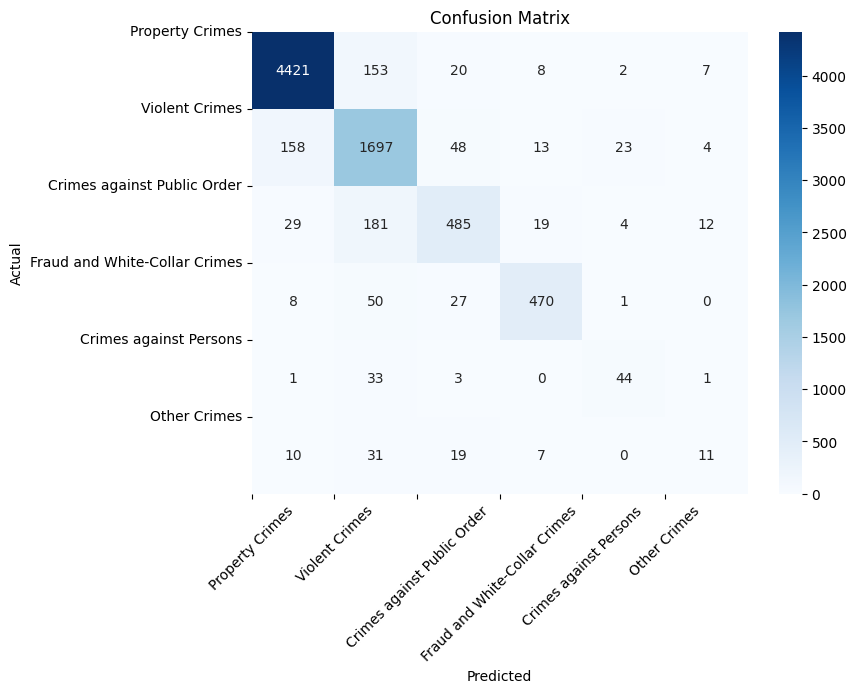

In [ ]:
# Plot the confusion matrix
crime_categories = ['Property Crimes', 'Violent Crimes', 'Crimes against Public Order', 'Fraud and White-Collar Crimes', 'Crimes against Persons', 'Other Crimes']
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(crime_categories)), crime_categories, rotation=45)
plt.yticks(np.arange(len(crime_categories)), crime_categories, rotation=0)  # Rotate the y-axis tick labels to be horizontal
plt.show()

# Hyper parameter Tuning

In [50]:
#grid_search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [500],
    'max_depth': [7],
    'learning_rate': [0.1],
    'subsample': [0.8],
    'max_features':['log2'],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.8}
Best Cross-Validation Score: 0.8949166666666667


In [ ]:
Y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, Y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_test,Y_pred))

Accuracy: 0.886625
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4611
           1       0.78      0.88      0.83      1943
           2       0.79      0.63      0.70       730
           3       0.90      0.81      0.85       556
           4       0.66      0.45      0.54        82
           5       0.23      0.04      0.07        78

    accuracy                           0.89      8000
   macro avg       0.72      0.63      0.66      8000
weighted avg       0.88      0.89      0.88      8000



# Insights